In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el conjunto de datos hormigon.csv

In [3]:
import pandas as pd

df = pd.read_csv("hormigon.csv")

Convertimos el dataset de regresión en clasificación si dividimos los datos en tres categorías (blandos = 0, medios = 1, duros = 2)

In [5]:
corte1_3 = df["strength"].quantile(0.3333)
corte2_3 = df["strength"].quantile(0.6666)

In [6]:
dureza0 = df["strength"] > corte1_3
dureza1 = df["strength"] > corte2_3
df["target"] = dureza0.astype("int") + dureza1.astype("int")

In [7]:
df["target"].value_counts()

target
1    344
0    343
2    343
Name: count, dtype: int64

In [8]:
df = df.drop(columns = "strength")

# Reducción a 2 dimensiones mediante "Principal Components Analysis"

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.iloc[:, :-1])  # Excluir la columna 'target' al realizar PCA

In [112]:
# Obtener los pesos de las características (component loadings)
loadings = pca.components_

# Mostrar los pesos de las características
loadings_df = pd.DataFrame(loadings, columns=df.columns[:-1], index=['Principal Component 1', 'Principal Component 2'])
print("Pesos de las características en los componentes principales:")
print(loadings_df)

Pesos de las características en los componentes principales:
                         cement      slag       ash     water  superplastic  \
Principal Component 1  0.904440 -0.254671 -0.239376  0.005420     -0.001121   
Principal Component 2  0.023062  0.788812 -0.299063  0.075483     -0.004873   

                       coarseagg   fineagg       age  strength  
Principal Component 1  -0.012811 -0.212263  0.100312  0.067214  
Principal Component 2  -0.276091 -0.446486  0.070005  0.040081  


In [11]:
print('Varianza explicada: %.4f' % pca.explained_variance_ratio_.sum())

print('Contribución de cada componente principal a la varianza explicada:')
for j in range(2):
    print(pca.explained_variance_ratio_[j])

Varianza explicada: 0.5746
Contribución de cada componente principal a la varianza explicada:
0.3257681635054439
0.24887432558564956


Crear un DataFrame con los componentes principales

In [12]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['target'] = df['target']

## Visualizar los resultados en 2 dimensiones

In [13]:
principal_df['target'].unique()

array([1, 0, 2])

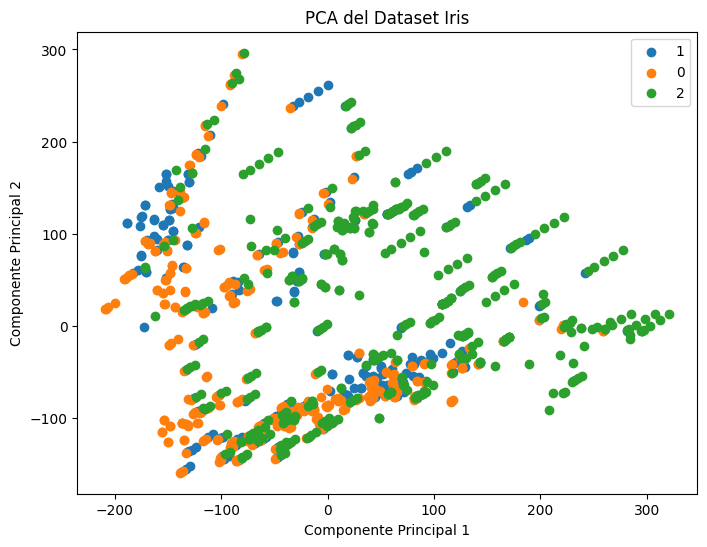

In [ ]:
plt.figure(figsize=(8, 6))
for target in principal_df['target'].unique():
    subset = principal_df[principal_df['target'] == target]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=target)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del Dataset Iris')
plt.legend()
plt.show()

## Obtener los pesos de las características originales en el cálculo de las Componentes Principales (component loadings)

In [14]:
# Obtener los pesos de las características (component loadings)
loadings = pca.components_

# Mostrar los pesos de las características
loadings_df = pd.DataFrame(loadings, columns=df.columns[:-1], index=['Principal Component 1', 'Principal Component 2'])
print("Pesos de las características en los componentes principales:")
print(loadings_df)

Pesos de las características en los componentes principales:
                         cement      slag       ash     water  superplastic  \
Principal Component 1  0.905636 -0.262578 -0.238606  0.005559     -0.001325   
Principal Component 2  0.032661  0.786028 -0.303039  0.076253     -0.005110   

                       coarseagg   fineagg       age  
Principal Component 1  -0.009092 -0.210124  0.098367  
Principal Component 2  -0.274566 -0.450725  0.069862  


# Reducción a 3 dimensiones mediante "Principal Components Analysis"

In [15]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df.iloc[:, :-1])  # Excluir la columna 'target' al realizar PCA

Crear un DataFrame con los componentes principales

In [17]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
principal_df['target'] = df['target']

## Obtener los pesos de las características originales en el cálculo de las Componentes Principales (component loadings)

In [ ]:
# Obtener los pesos de las características (component loadings)
loadings = pca.components_

# Mostrar los pesos de las características
loadings_df = pd.DataFrame(loadings, columns=df.columns[:-1], index=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
print("Pesos de las características en los componentes principales:")
print(loadings_df)

Pesos de las características en los componentes principales:
                         cement      slag       ash     water  superplastic  \
Principal Component 1  0.905636 -0.262578 -0.238606  0.005559     -0.001325   
Principal Component 2  0.032661  0.786028 -0.303039  0.076253     -0.005110   
Principal Component 3  0.154815  0.072929 -0.051496 -0.041461      0.024054   

                       coarseagg   fineagg       age  
Principal Component 1  -0.009092 -0.210124  0.098367  
Principal Component 2  -0.274566 -0.450725  0.069862  
Principal Component 3  -0.760712  0.610756 -0.118573  


In [106]:
print('Varianza explicada: %.4f' % pca.explained_variance_ratio_.sum())

print('Contribución de cada componente principal a la varianza explicada:')
for j in range(3):
    print(pca.explained_variance_ratio_[j])

Varianza explicada: 0.7594
Contribución de cada componente principal a la varianza explicada:
0.3257681635054432
0.24887432558564976
0.18479759946801447


## Visualizar los resultados en 3 dimensiones

In [19]:
import plotly.graph_objs as go

# Función para pintar las reglas en 3D
def rotable_3d(x, col1, col2, col3, cat_col):
    datos = x.copy()
    # reseteo el índice de los datos originales
    datos.reset_index(inplace=True)

    # Crear el scatter plot en 3D con Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=datos[col1],
        y=datos[col2],
        z=datos[col3],
        mode='markers',
        marker=dict(
            size=6*datos[cat_col]+10,
            color=datos[cat_col],  # Color según el valor de la columna categórica
            colorscale='Viridis',  # Escala de color
            opacity=0.8
        ),
        text= '<br>' + \
             col1 +": " + datos[col1].astype(str) + '<br>' + \
             col2 +": " + datos[col2].astype(str) + '<br>' + \
             col3 +": " + datos[col3].astype(str),
        hoverinfo='text'  # Mostrar texto en el menú emergente
    )])

    # Configuración del diseño del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title=col1,
            yaxis_title=col2,
            zaxis_title=col3,
        ),
        title='Scatter Plot 3D de Soporte vs Confianza vs Lift',
        width=800,
        height=1200,
    )

    # Mostrar el gráfico
    fig.show()

In [20]:
rotable_3d(principal_df, 'Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'target')

# Comparación con escoger simplemente tres características

Podemos elegir tres entre los nombres de las características originales

In [21]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'target'],
      dtype='object')

Quitando, por ejemplo, 'sepal width (cm)'

In [22]:
rotable_3d(df, 'cement', 'superplastic', 'age', 'target')